In [68]:
# Basic import
import numpy as np
import scipy
import pandas as pd

# Plotting figures
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Display file path
import os
for dirname, _, filenames in os.walk('Data/fifa19'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Data/fifa19/data.csv


In [47]:
# Saving figures
from pathlib import Path
PROJECT_ROOT_DIR = Path(os.getcwd())
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# Read the data
%time data = pd.read_csv('Data/fifa19/data.csv')
data.shape

CPU times: user 142 ms, sys: 9.11 ms, total: 151 ms
Wall time: 151 ms


(18207, 89)

### Pre-processing


In [3]:
# Trim down useless columns
data = data.drop(columns=['Unnamed: 0', 'Photo', 'Club Logo','Flag','Real Face','Loaned From','Special', 
                          'Release Clause', 'Joined', 'Contract Valid Until', 'LS', 'ST', 'RS','LW', 'LF',
                          'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 
                          'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'])

In [4]:
# Peek into the existing columns
data.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [5]:
# Check for NULL value
data.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                         0
Wage                          0
Preferred Foot               48
International Reputation     48
Weak Foot                    48
Skill Moves                  48
Work Rate                    48
Body Type                    48
Position                     60
Jersey Number                60
Height                       48
Weight                       48
Crossing                     48
Finishing                    48
HeadingAccuracy              48
ShortPassing                 48
Volleys                      48
Dribbling                    48
Curve                        48
FKAccuracy                   48
LongPassing                  48
BallControl                  48
Acceleration                 48
SprintSpeed                  48
Agility 

In [6]:
# Remove not filled rows
data = data[~data['Height'].isnull()]
data = data[~data['Position'].isnull()]

# Fill in missing values
data['Club'] = data['Club'].fillna('Free Agent')

In [7]:
# Check NA value again
data.isnull().sum().sum()

0

In [9]:
# Dataframe for players' attributes
attrib = data[['ID', 'Overall', 'Potential', 'Position', 'Weak Foot', 'Skill Moves', 'Work Rate', 
               'Body Type', 'Height', 'Weight', 'Crossing', 'Finishing','HeadingAccuracy', 'ShortPassing',
               'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
               'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower','Jumping', 'Stamina', 
               'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 
               'Composure','Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving','GKHandling','GKKicking', 
               'GKPositioning', 'GKReflexes', 'Preferred Foot']]
attrib.sample(n=5)

,ID,Overall,Potential,Position,Weak Foot,Skill Moves,Work Rate,Body Type,Height,Weight,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Preferred Foot
2585,198136,74,74,LW,3.0,4.0,High/ Medium,Normal,6'0,172lbs,...,71.0,55.0,40.0,26.0,15.0,10.0,10.0,13.0,8.0,Right
11203,228145,64,75,RW,3.0,3.0,Medium/ Medium,Normal,5'8,157lbs,...,55.0,44.0,28.0,21.0,15.0,8.0,12.0,8.0,12.0,Right
17940,246129,51,69,CM,3.0,3.0,Medium/ High,Lean,5'10,146lbs,...,49.0,44.0,39.0,42.0,11.0,8.0,7.0,11.0,14.0,Right
1335,186197,76,76,LM,3.0,4.0,Medium/ Medium,Lean,5'8,141lbs,...,74.0,30.0,41.0,25.0,7.0,12.0,7.0,14.0,13.0,Left
4882,198175,70,73,ST,2.0,3.0,High/ Medium,Normal,6'2,172lbs,...,51.0,33.0,24.0,14.0,16.0,13.0,15.0,14.0,10.0,Right


Saving figure 1_Overall_Ratings_Hist


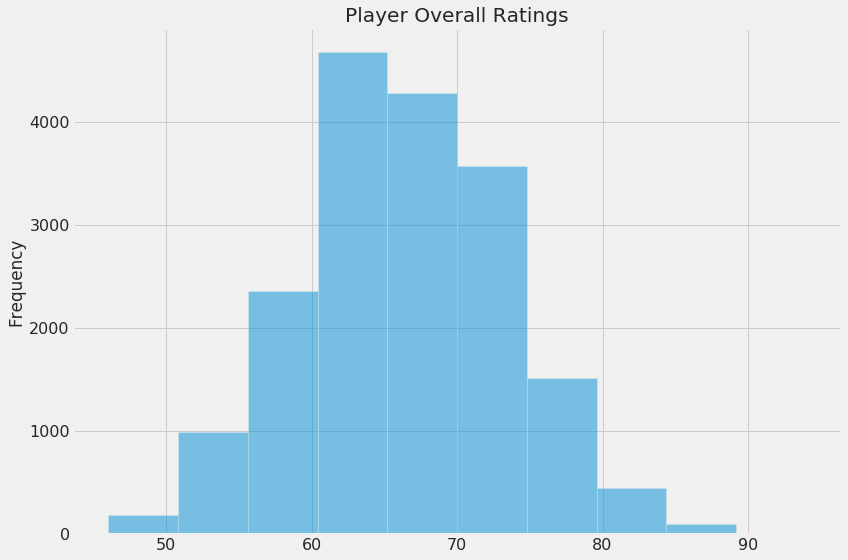

In [69]:
# Peek the distribution of overall ratings
plt.figure()
data['Overall'].plot.hist(figsize=[12,8], fontsize=16, alpha=0.5, title='Player Overall Ratings')
save_fig('1_Overall_Ratings_Hist')

In [11]:
# Remove non-float data and overall rating
attrib = attrib.drop(columns=['Overall', 'Potential', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type',
                              'Height', 'Weight', ])

In [12]:
# Remove Goalkeeper and goalkeeper related attributes
attrib = attrib[attrib.Position != 'GK']
attrib = attrib.drop(columns=['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'])

In [13]:
attrib.Position.unique()

array(['RF', 'ST', 'LW', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB', 'LDM',
       'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM', 'RW',
       'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

Saving figure 2_Player_Attributes_Box


<Figure size 432x288 with 0 Axes>

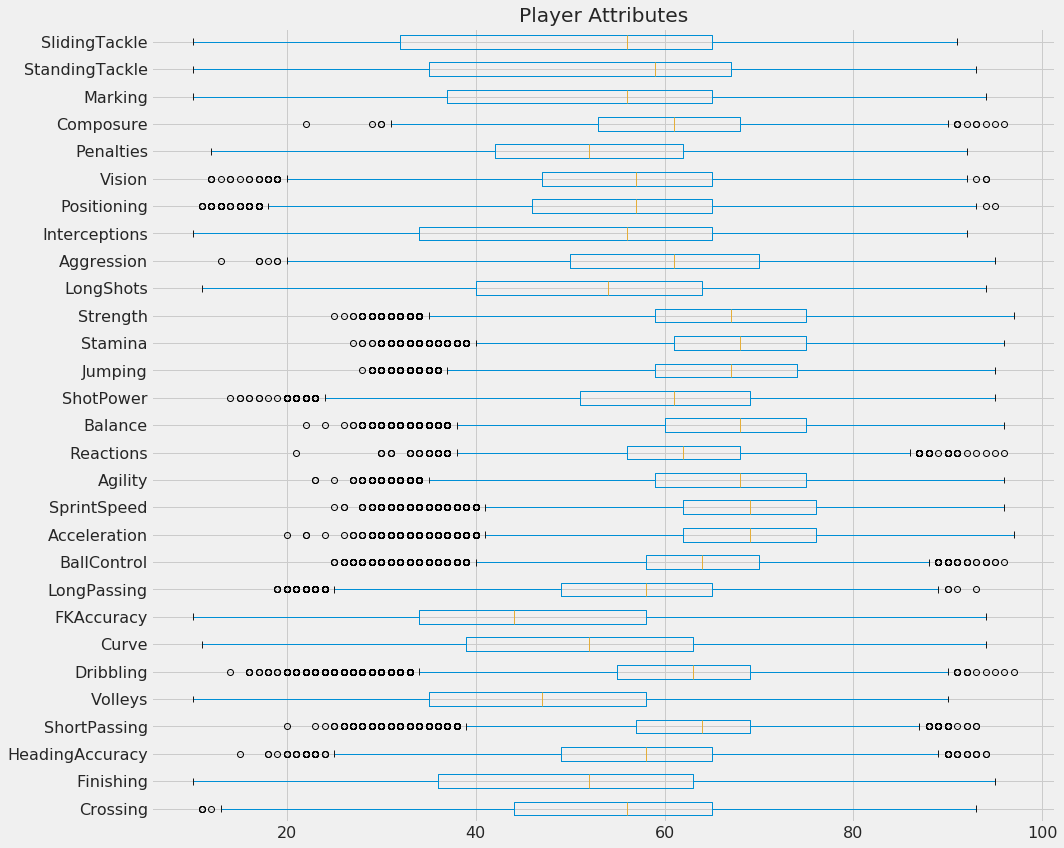

In [50]:
# Check distribution of attributes
plt.figure()
attrib.iloc[:, 2:].plot.box(figsize=[15,12], fontsize=16, title='Player Attributes', vert=False)
save_fig('2_Player_Attributes_Box')

In [15]:
attrib

,ID,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Preferred Foot
0,158023,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,...,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,Left
1,20801,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,...,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,Right
2,190871,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,...,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,Right
4,192985,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,...,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,Right
5,183277,LF,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,...,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,CM,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,...,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,Right
18203,243165,ST,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,...,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,Right
18204,241638,ST,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,...,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,Right
18205,246268,RW,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,...,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,Right


In [16]:
# Normalisation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
stdScaler = StandardScaler()
mmScaler = MinMaxScaler()

x = attrib.iloc[:, 2:31].to_numpy()
x_scaled = stdScaler.fit_transform(x)
attrib_norm = pd.DataFrame(x_scaled)

Saving figure 3_Distribution_of_One_Attribute_Hist


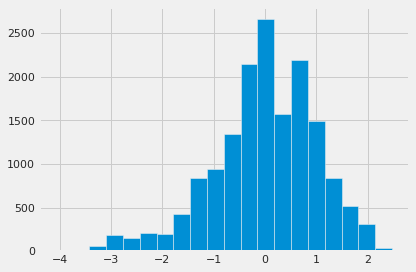

In [51]:
# Check the distribution of one attribute
plt.hist(attrib_norm.iloc[:, 10], bins=20)
save_fig('3_Distribution_of_One_Attribute_Hist')

Saving figure 4_Normalised_Player_Attributes_Box


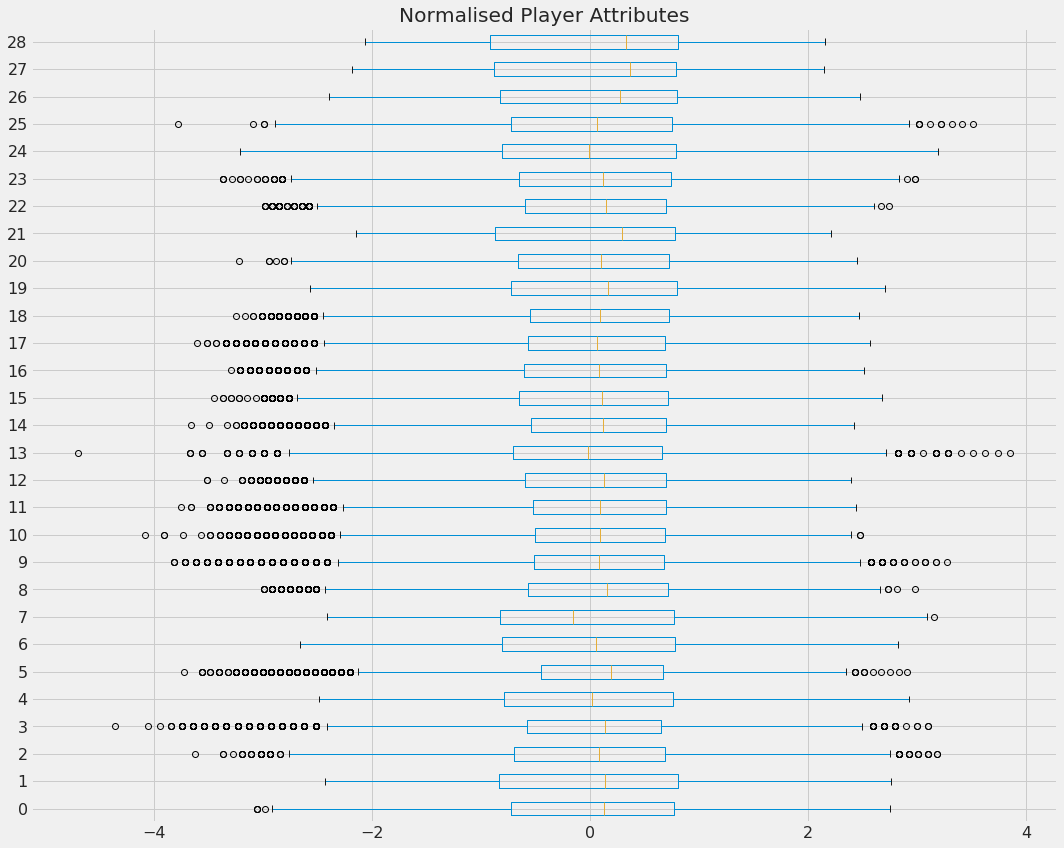

In [52]:
attrib_norm.plot.box(figsize=[15,12], fontsize=16, title='Normalised Player Attributes', vert=False)
save_fig('4_Normalised_Player_Attributes_Box')

In [19]:
info.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [20]:
# Labelling players into 3 groups by position
def position_label(c):
    if c in ['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RW', 'CF', 'LM', 'RM']:
        return 'ATK'
    elif c in ['RCB', 'CB', 'LCB', 'LB', 'RB', 'RWB', 'LWB']:
        return 'DEF'
    else:
        return 'MID'

attrib['Position'] = attrib['Position'].apply(position_label)
np.unique(attrib['Position'].to_numpy(), return_counts=True)

(array(['ATK', 'DEF', 'MID'], dtype=object), array([5637, 5866, 4619]))

In [21]:
# Labelling players into 3 groups by Overall
attrib['Rating'] = pd.cut(data['Overall'], [-1, 64, 80, 99], labels=['Low', 'Medium', 'High'])
np.unique(attrib['Rating'].to_numpy(), return_counts=True)

(array(['High', 'Low', 'Medium'], dtype=object), array([ 363, 6167, 9592]))

In [22]:
# Labelling players into 3 groups by Potential
attrib['Growth'] = pd.cut(data['Potential']-data['Overall'], [-1,2,8,30], labels=['Veteran','Developing','Talent'])
np.unique(attrib['Growth'].to_numpy(), return_counts=True)

(array(['Developing', 'Talent', 'Veteran'], dtype=object),
 array([4873, 4123, 7126]))

In [23]:
# Labelling players into 3 groups by Age
attrib['Age'] = pd.cut(data['Age'], [-1,22,30,50], labels=['Under 22', '23 to 30', 'Over 30'])
np.unique(attrib['Age'].to_numpy(), return_counts=True)

(array(['23 to 30', 'Over 30', 'Under 22'], dtype=object),
 array([8579, 2112, 5431]))

Saving figure 5_Correlation_Heatmap


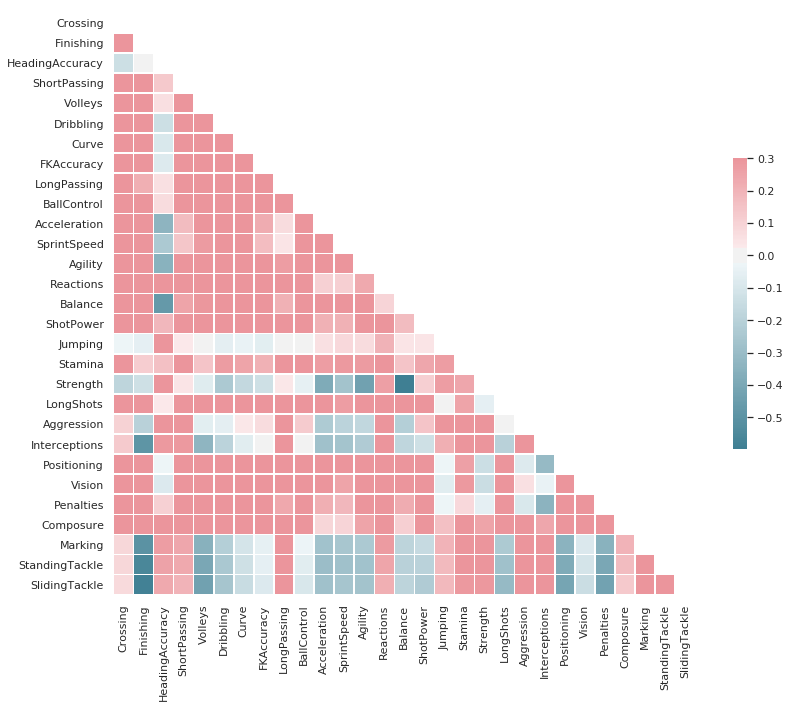

In [53]:
# Correlation heatmap
sns.set(style="white")

corr = attrib.drop(columns='ID').corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
save_fig('5_Correlation_Heatmap')

# Project onto existing axis


In [26]:
# PCA
X = x_scaled
N = np.shape(X)[0]
C = np.dot(X.T, X)/(N - 1)
[U, D] = np.linalg.eig(C)

In [27]:
# Project onto first 2 principal components
X1 = np.dot(X, D[:, 0])
X2 = np.dot(X, D[:, 1])

Saving figure 6_Position_Labelled_PCA_Scatter


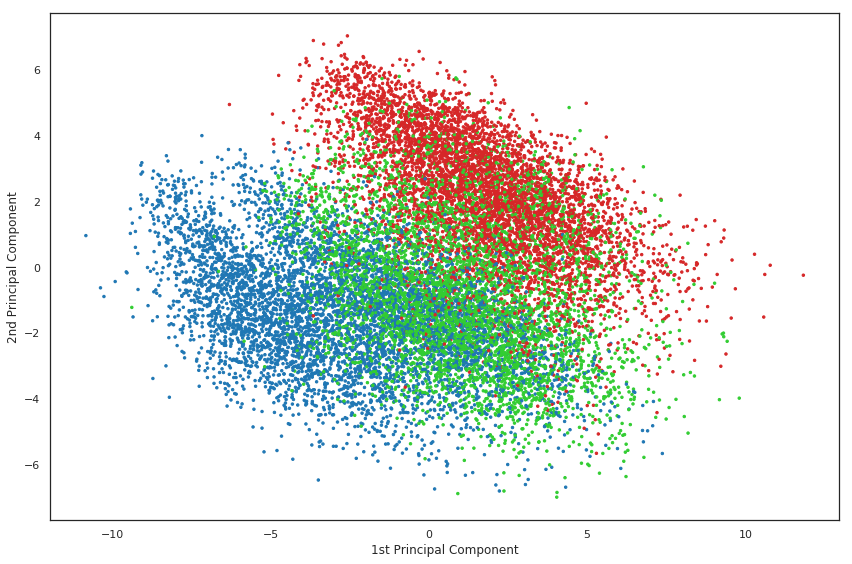

In [54]:
# Colouring dots by position
label_1 = attrib.iloc[:, 1].to_numpy()
colour = ['tab:red' if l == 'ATK' else 'tab:blue' if l == 'DEF' else 'limegreen' for l in label_1]
attrib_pca = pd.DataFrame({'1st Principal Component':X1,'2nd Principal Component':X2})
attrib_pca.plot.scatter(x='1st Principal Component', y='2nd Principal Component',c=colour, s=6, figsize=[12,8])
save_fig('6_Position_Labelled_PCA_Scatter')

Saving figure 7_Eigenvalue_Spectrum_Plot


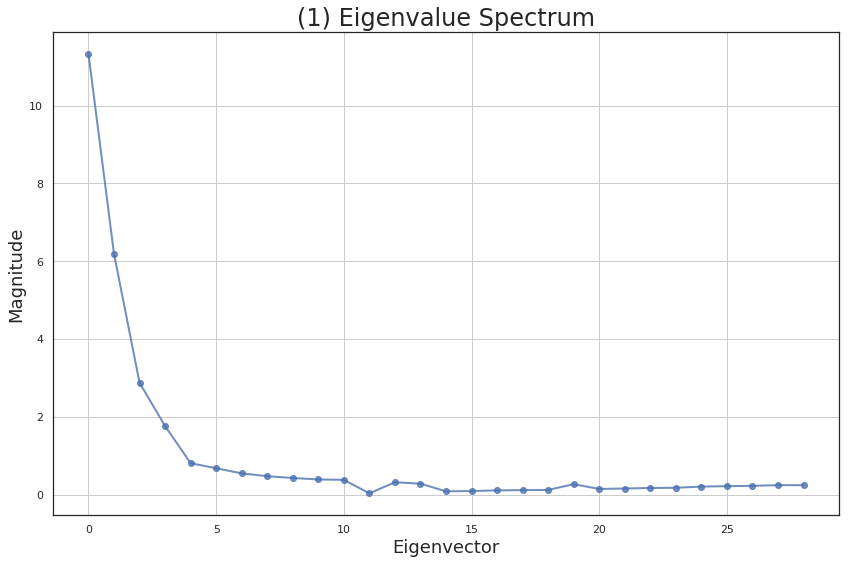

In [59]:
# Inspect the eigenvalues
plt.figure(figsize=[12,8])
plt.plot(U, 'bo-', alpha=0.8, linewidth=2)
plt.grid()
plt.xlabel('Eigenvector', fontsize=18)
plt.ylabel('Magnitude', fontsize=18)
plt.title('(1) Eigenvalue Spectrum', fontsize=24)
save_fig('7_Eigenvalue_Spectrum_Plot')
plt.show()

Saving figure 8_Cumulative_Eigenvalues_Plot


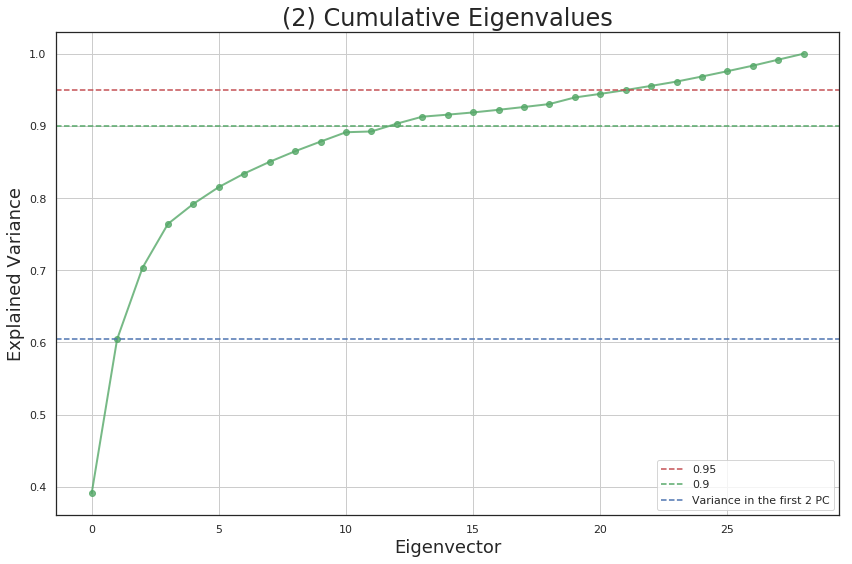

In [60]:
plt.figure(figsize=[12,8])
U_cs = np.cumsum(U) / sum(U)
plt.plot(U_cs, 'go-', alpha=0.8, linewidth=2)
l1 = plt.axhline(0.95, color='r', linestyle='--')
l2 = plt.axhline(0.9, color='g', linestyle='--')
l3 = plt.axhline((U[0]+U[1])/sum(U), color='b', linestyle='--')
plt.grid()
plt.xlabel('Eigenvector', fontsize=18)
plt.ylabel('Explained Variance', fontsize=18)
plt.title('(2) Cumulative Eigenvalues', fontsize=24)
plt.legend((l1, l2, l3), ('0.95', '0.9', 'Variance in the first 2 PC'), loc='lower right')
save_fig('8_Cumulative_Eigenvalues_Plot')
plt.show()

Saving figure 9_Correlation_First_Two_PCs_Bar


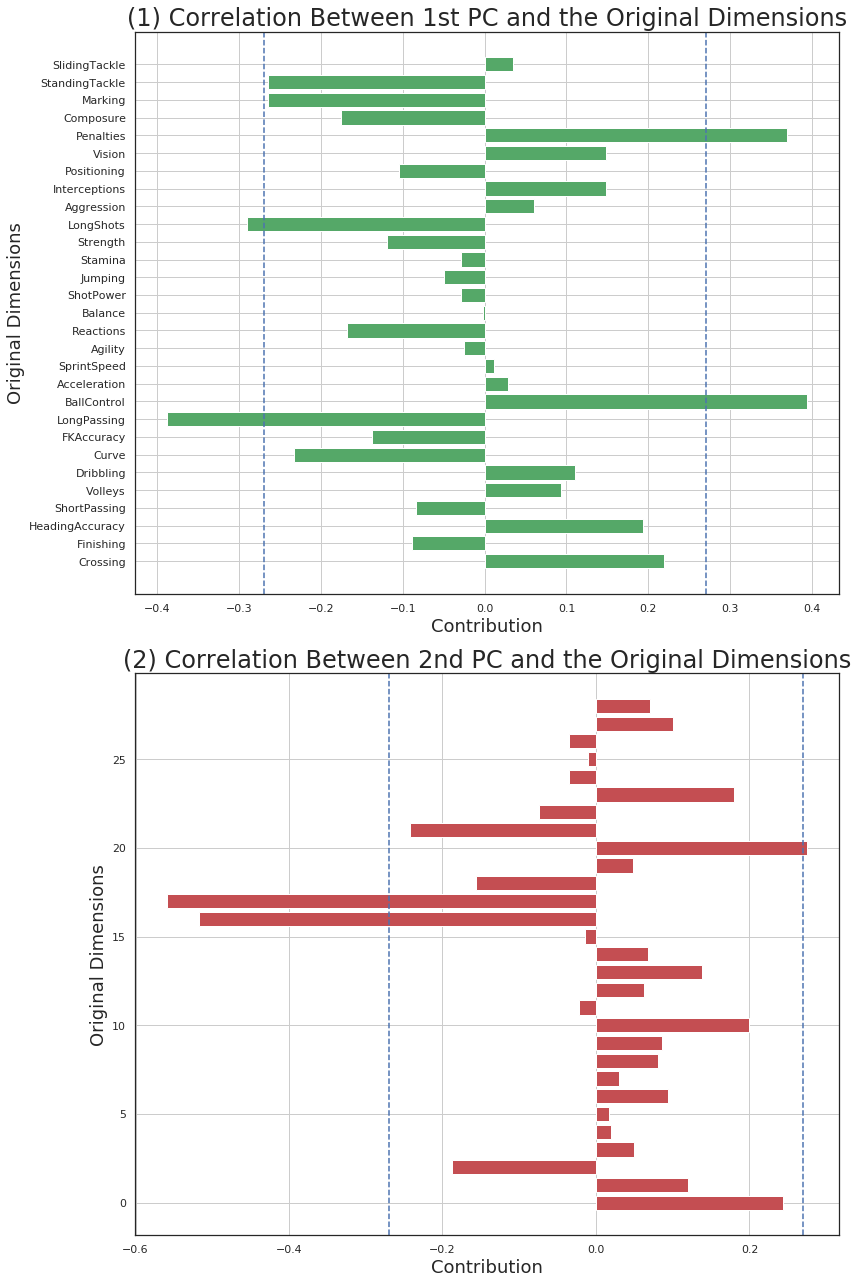

In [63]:
# Inspect the eigenvectors
plt.figure(figsize=[12,18])

plt.subplot(2, 1, 1)
plt.title('(1) Correlation Between 1st PC and the Original Dimensions', fontsize=24)
plt.xlabel('Contribution', fontsize=18)
plt.ylabel('Original Dimensions', fontsize=18)
plt.barh(attrib.columns[2:31], D[0], color='g')
plt.axvline(0.27, color='b', linestyle='--')
plt.axvline(-0.27, color='b', linestyle='--')
plt.grid()

plt.subplot(2, 1, 2)
plt.title('(2) Correlation Between 2nd PC and the Original Dimensions', fontsize=24)
plt.xlabel('Contribution', fontsize=18)
plt.ylabel('Original Dimensions', fontsize=18)
plt.barh(range(29), (D[1]), color='r')
plt.axvline(0.27, color='b', linestyle='--')
plt.axvline(-0.27, color='b', linestyle='--')
plt.grid()
save_fig('9_Correlation_First_Two_PCs_Bar')
plt.show()

In [32]:
# Check the most important dimensions in PC1: 9, 8, 24, 19 (>0.27)
print(attrib.columns[[11, 10, 26, 21]])
# Check the most important dimensions in PC2: 17, 16, 20(>0.27)
print(attrib.columns[[19, 18, 22]])

Index(['BallControl', 'LongPassing', 'Penalties', 'LongShots'], dtype='object')
Index(['Stamina', 'Jumping', 'Aggression'], dtype='object')


Saving figure 10_Rating_Labelled_PCA_Scatter


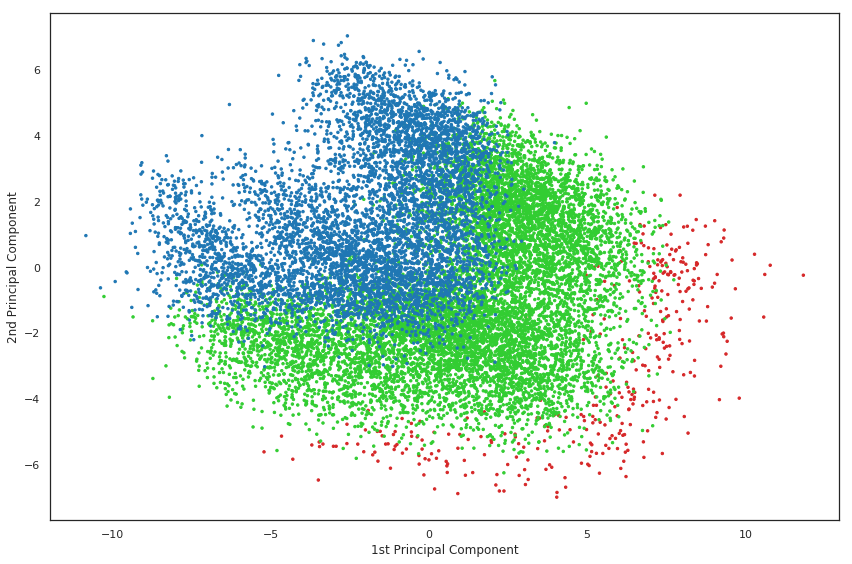

In [62]:
# Colouring dots by rating
label_2 = attrib.iloc[:, 32].to_numpy()
colour = ['tab:red' if l == 'High' else 'tab:blue' if l == 'Low' else 'limegreen' for l in label_2]
attrib_pca = pd.DataFrame({'1st Principal Component':X1,'2nd Principal Component':X2})
attrib_pca.plot.scatter(x='1st Principal Component', y='2nd Principal Component',c=colour, s=6, figsize=[12,8])
save_fig('10_Rating_Labelled_PCA_Scatter')

Saving figure 11_Growth_Labelled_PCA_Scatter


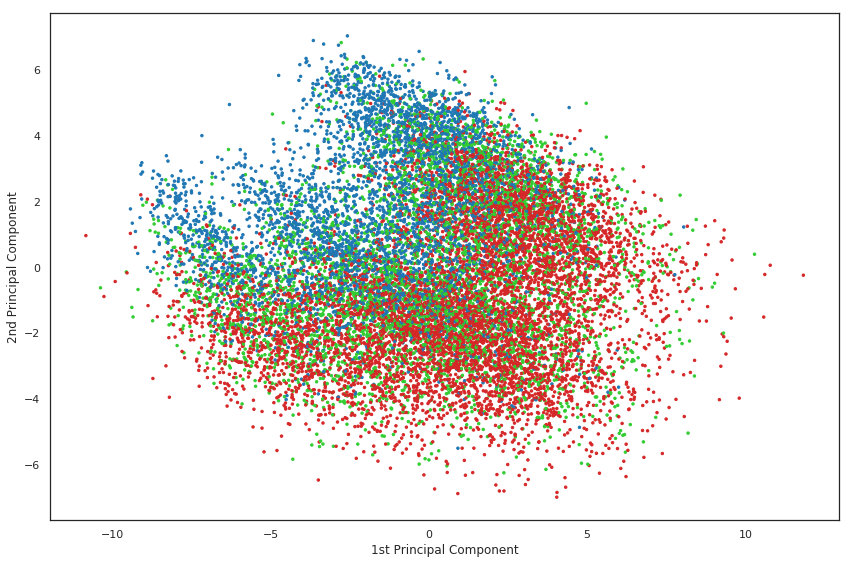

In [64]:
# Colouring dots by growth
label_3 = attrib.iloc[:, 33].to_numpy()
colour = ['tab:red' if l == 'Veteran' else 'tab:blue' if l == 'Talent' else 'limegreen' for l in label_3]
attrib_pca = pd.DataFrame({'1st Principal Component':X1,'2nd Principal Component':X2})
attrib_pca.plot.scatter(x='1st Principal Component', y='2nd Principal Component',c=colour, s=6, figsize=[12,8])
save_fig('11_Growth_Labelled_PCA_Scatter')

Saving figure 12_Age_Labelled_PCA_Scatter


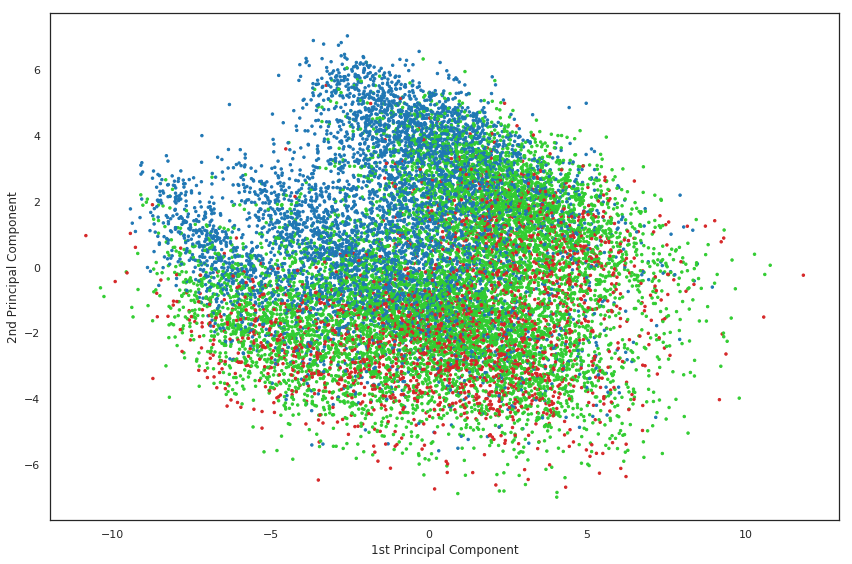

In [65]:
# Colouring dots by age
label_4 = attrib.iloc[:, 34].to_numpy()
colour = ['tab:red' if l == 'Over 30' else 'tab:blue' if l == 'Under 22' else 'limegreen' for l in label_4]
attrib_pca = pd.DataFrame({'1st Principal Component':X1,'2nd Principal Component':X2})
attrib_pca.plot.scatter(x='1st Principal Component', y='2nd Principal Component',c=colour, s=6, figsize=[12,8])
save_fig('12_Age_Labelled_PCA_Scatter')

Saving figure 13_Preferred_Foot_Labelled_PCA_Scatter


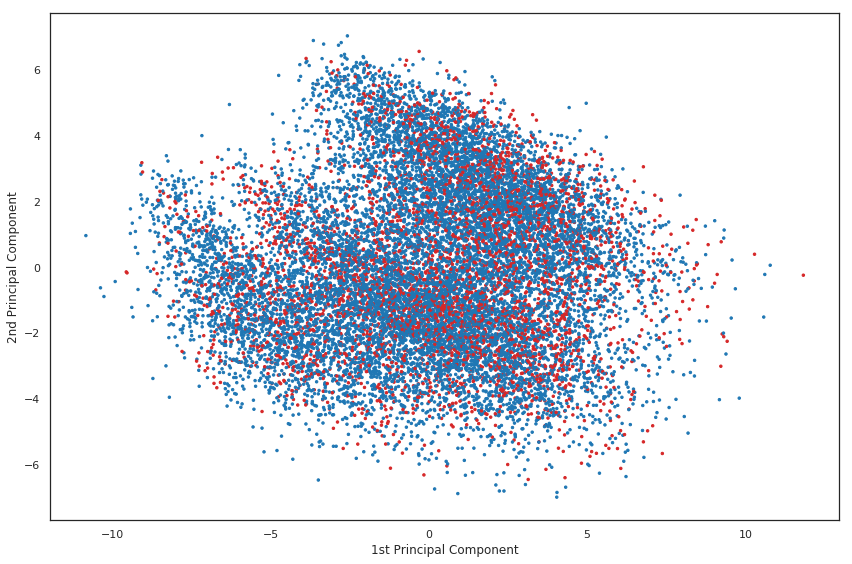

In [66]:
# Colouring dots by preferred foot
label_5 = attrib.iloc[:, 31].to_numpy()
colour = ['tab:red' if l == 'Left' else 'tab:blue' for l in label_5]
attrib_pca = pd.DataFrame({'1st Principal Component':X1,'2nd Principal Component':X2})
attrib_pca.plot.scatter(x='1st Principal Component', y='2nd Principal Component',c=colour, s=6, figsize=[12,8])
save_fig('13_Preferred_Foot_Labelled_PCA_Scatter')